# ANN & MNIST : exercise

## 라이브러리 불러오기

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd

from sklearn.metrics import accuracy_score

## 데이터 불러오기

In [2]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

In [3]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

id = 0
다음 그림은 숫자 5 입니다.


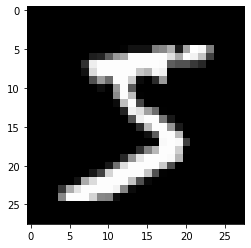

In [5]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

# id = rd.randrange(0,10000)
id = 0

print(f'id = {id}')
print(f'다음 그림은 숫자 {train_y[id]} 입니다.')

plt.imshow(train_x[id], cmap='gray')
plt.show()

## 데이터 전처리

* reshape

In [6]:
train_x = train_x.reshape([train_x.shape[0], -1])
test_x = test_x.reshape([test_x.shape[0], -1])

train_x.shape, test_x.shape

((60000, 784), (10000, 784))

* min-max scaling

In [7]:
max_num = train_x.max()
min_num = train_x.min()

train_x = (train_x - min_num) / (max_num - min_num)
test_x = (test_x - min_num) / (max_num - min_num)

(train_x.min(), train_x.max()), (test_x.min(), test_x.max())

((0.0, 1.0), (0.0, 1.0))

* target feature : One-hot Encoding

In [8]:
from tensorflow.keras.utils import to_categorical

len_y = len(set(train_y))

train_y = to_categorical(train_y, len_y)
test_y = to_categorical(test_y, len_y)

train_y.shape, test_y.shape

((60000, 10), (10000, 10))

## 모델링 I

1. Sequential, Functional 아무 것이나!
2. 히든레이어 없이 epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [9]:
# x를 1차원으로 생성하지 않은 경우

keras.backend.clear_session()

input_layer = keras.layers.Input(shape=(28,28))
flatten_layer = keras.layers.Flatten()(input_layer)
output_layer = keras.layers.Dense(10, activation='softmax')(flatten_layer)

model = keras.models.Model(input_layer, output_layer)

model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'], optimizer=keras.optimizers.Adam())

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [10]:
########################
# 모델링 I : .fit( ) 까지!
########################
keras.backend.clear_session()

input_layer = keras.layers.Input(shape=(train_x.shape[1]))
output_layer = keras.layers.Dense(10, activation='softmax')(input_layer)

model = keras.models.Model(input_layer, output_layer)

model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'], optimizer=keras.optimizers.Adam())

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [11]:
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   min_delta=0,
                                   patience=5, 
                                   verbose=1,
                                   restore_best_weights=True)

model.fit(train_x, train_y, epochs=50, validation_split=0.2, callbacks=[es], verbose=1)

Epoch 1/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5155 - accuracy: 0.8674 - val_loss: 0.3186 - val_accuracy: 0.9117
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3186 - accuracy: 0.9111 - val_loss: 0.2889 - val_accuracy: 0.9207
Epoch 3/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2940 - accuracy: 0.9177 - val_loss: 0.2773 - val_accuracy: 0.9239
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2818 - accuracy: 0.9215 - val_loss: 0.2719 - val_accuracy: 0.9247
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2734 - accuracy: 0.9233 - val_loss: 0.2737 - val_accuracy: 0.9245
Epoch 6/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2692 - accuracy: 0.9245 - val_loss: 0.2648 - val_accuracy: 0.9273
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2639 - accuracy: 0.9258 - val_loss: 0.2644 - val_accuracy:

In [12]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

트레이닝 정확도 : 93.24%
테스트 정확도 : 92.68%


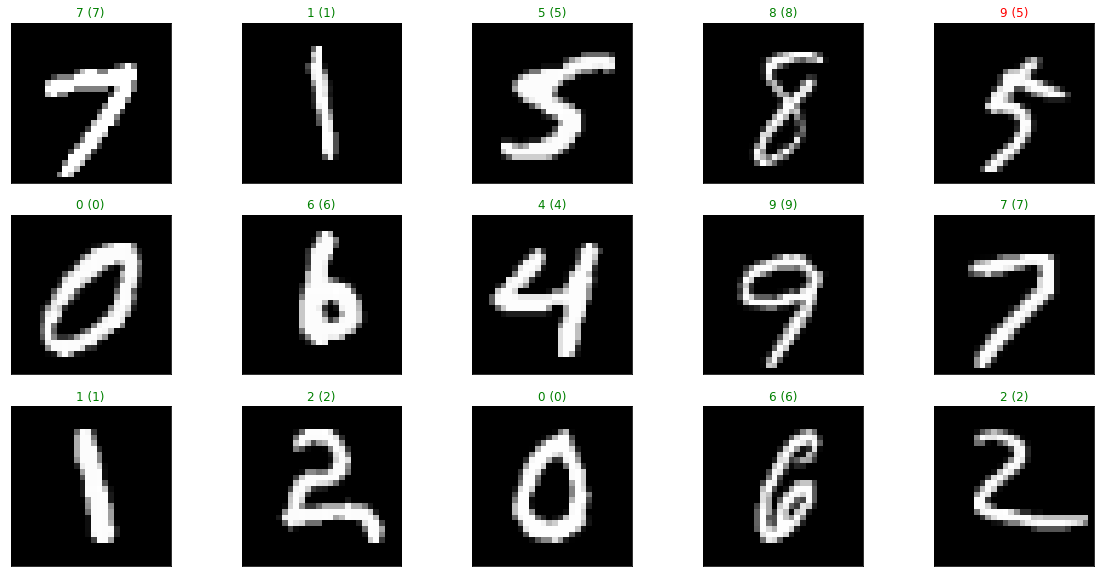

In [13]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 7859
다음 그림은 숫자 5 입니다.
모델의 예측 : 8
모델의 카테고리별 확률 : [ 0.  0.  0.  0. 18.  0.  6.  0. 73.  1.]
틀렸어요


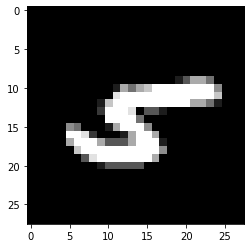

In [14]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [15]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.2671 - accuracy: 0.9268


[0.26711493730545044, 0.926800012588501]



---



## 모델링 II

1. Sequential, Functional 아무 것이나!
2. 히든레이어 3개 이상 쌓고, epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [16]:
#########################
# 모델링 II : .fit( ) 까지!
#########################
keras.backend.clear_session()

input_layer = keras.layers.Input(shape=(train_x.shape[1]))
hiden_layer = keras.layers.Dense(256, activation='relu')(input_layer)
hiden_layer = keras.layers.Dense(128, activation='relu')(hiden_layer)
hiden_layer = keras.layers.Dense(64, activation='relu')(hiden_layer)
output_layer = keras.layers.Dense(len_y, activation='softmax')(hiden_layer)

model = keras.models.Model(input_layer, output_layer)

model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'], optimizer=keras.optimizers.Adam())

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


In [17]:
es = keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0, patience=5, verbose=1, restore_best_weights=True)

model.fit(train_x, train_y, epochs=50, verbose=1, callbacks=[es], validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2225 - accuracy: 0.9329 - val_loss: 0.1447 - val_accuracy: 0.9566
Epoch 2/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0956 - accuracy: 0.9704 - val_loss: 0.1229 - val_accuracy: 0.9627
Epoch 3/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0677 - accuracy: 0.9789 - val_loss: 0.0941 - val_accuracy: 0.9720
Epoch 4/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0514 - accuracy: 0.9845 - val_loss: 0.0925 - val_accuracy: 0.9744
Epoch 5/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0437 - accuracy: 0.9861 - val_loss: 0.0892 - val_accuracy: 0.9767
Epoch 6/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0359 - accuracy: 0.9889 - val_loss: 0.0879 - val_accuracy: 0.9788
Epoch 7/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0304 - accuracy: 0.9903 - val_loss: 0.1085 - val_accuracy:

In [18]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

트레이닝 정확도 : 99.10%
테스트 정확도 : 97.99%


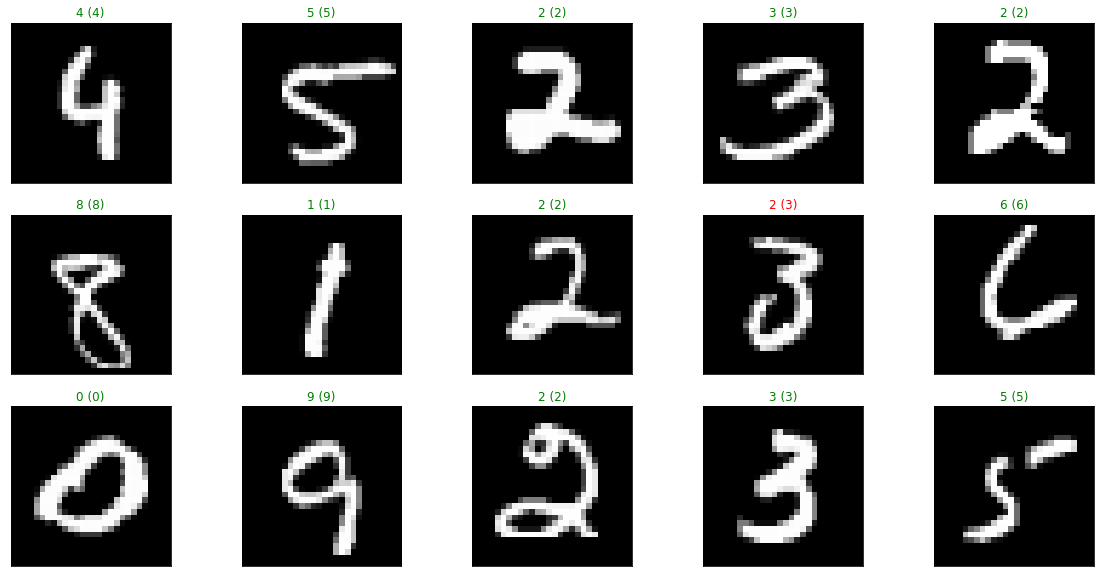

In [19]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 2033
다음 그림은 숫자 0 입니다.
모델의 예측 : 4
모델의 카테고리별 확률 : [19.  0.  1.  0. 79.  0.  0.  0.  0.  0.]
틀렸어요


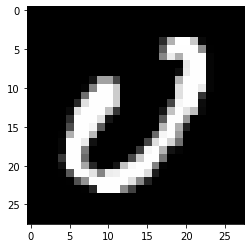

In [20]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [21]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.0799 - accuracy: 0.9799


[0.07992863655090332, 0.9799000024795532]